In [1]:
import pandas as pd
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, AveragePooling2D, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras_preprocessing import image
from google.colab import files
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_dir='/content/drive/MyDrive/Bangkit/artnesia/modelling/'

In [4]:
%cd '/content/drive/MyDrive/Bangkit/artnesia/modelling/'

/content/drive/MyDrive/Bangkit/artnesia/modelling


In [5]:
ls

 artnesia.tflite                          dataset/
 ArtnesiaTfLiteModelling.ipynb            test/
 best_model.h5                            train/
'Copy of ArtnesiaTfLiteModelling.ipynb'   val/


In [6]:
def list_files(startpath):
  for root, dirs, files in os.walk(startpath):
    level = root.replace(startpath, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))
    subident = ' ' * 4 * (level + 1)
list_files(base_dir)

/
dataset/
    angklung/
    blangkon/
    ganongan/
    noken/
    wayang_petruk/
    keris/
    sasando/
    wayang_semar/
    wayang_bagong/
    wayang_gareng/
    batik_cendrawasih/
    batik_bali/
train/
    angklung/
    blangkon/
    ganongan/
    noken/
    wayang_petruk/
    keris/
    sasando/
    wayang_semar/
    wayang_bagong/
    wayang_gareng/
    batik_cendrawasih/
    batik_bali/
val/
    angklung/
    blangkon/
    ganongan/
    noken/
    wayang_petruk/
    keris/
    sasando/
    wayang_semar/
    wayang_bagong/
    wayang_gareng/
    batik_cendrawasih/
    batik_bali/
test/
    angklung/
    blangkon/
    ganongan/
    noken/
    wayang_petruk/
    keris/
    sasando/
    wayang_semar/
    wayang_bagong/
    wayang_gareng/
    batik_cendrawasih/
    batik_bali/


In [7]:
label = list()
counter = list()

for x in os.listdir(os.path.join(base_dir, 'dataset')):
  print(x)
  label.append(x)
  i = 0
  for y in os.listdir(os.path.join(base_dir, 'dataset/' + str(x))):
    i = i+1
  print(i)
  counter.append(i)

angklung
250
blangkon
250
ganongan
250
noken
250
wayang_petruk
250
keris
250
sasando
156
wayang_semar
250
wayang_bagong
250
wayang_gareng
250
batik_cendrawasih
249
batik_bali
250


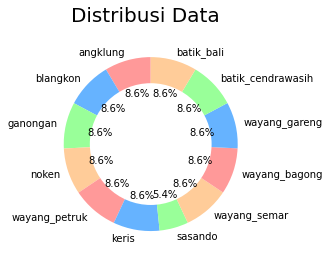

In [8]:
import matplotlib.pyplot as plt
# Pie chart
labels = label
sizes = counter
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
plt.suptitle('Distribusi Data', fontsize=20)
fig.gca().add_artist(centre_circle)

In [9]:
#!pip install split-folders

In [10]:
#import splitfolders
#splitfolders.ratio('dataset', output= base_dir, seed=1337, ratio=(.8, .19, .01), group_prefix=None)

In [11]:
list_files(base_dir)

/
dataset/
    angklung/
    blangkon/
    ganongan/
    noken/
    wayang_petruk/
    keris/
    sasando/
    wayang_semar/
    wayang_bagong/
    wayang_gareng/
    batik_cendrawasih/
    batik_bali/
train/
    angklung/
    blangkon/
    ganongan/
    noken/
    wayang_petruk/
    keris/
    sasando/
    wayang_semar/
    wayang_bagong/
    wayang_gareng/
    batik_cendrawasih/
    batik_bali/
val/
    angklung/
    blangkon/
    ganongan/
    noken/
    wayang_petruk/
    keris/
    sasando/
    wayang_semar/
    wayang_bagong/
    wayang_gareng/
    batik_cendrawasih/
    batik_bali/
test/
    angklung/
    blangkon/
    ganongan/
    noken/
    wayang_petruk/
    keris/
    sasando/
    wayang_semar/
    wayang_bagong/
    wayang_gareng/
    batik_cendrawasih/
    batik_bali/


# Preprocessing

In [12]:
datagen = ImageDataGenerator(width_shift_range=0.2,
                              height_shift_range=0.2,
                              rescale=1./255,
                              shear_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [13]:
import os
from PIL import Image
folder_path = r'/content/drive/MyDrive/Bangkit/artnesia/modelling/train'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

In [14]:
import os
from PIL import Image
folder_path = r'/content/drive/MyDrive/Bangkit/artnesia/modelling/test'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

In [15]:
import os
from PIL import Image
folder_path = r'/content/drive/MyDrive/Bangkit/artnesia/modelling/val'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

In [16]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

TRAINING_DIR = '/content/drive/MyDrive/Bangkit/artnesia/modelling/train'
train_datagen = image.ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=45,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE, 
    shuffle=True
)


TESTING_DIR = '/content/drive/MyDrive/Bangkit/artnesia/modelling/test'
datagen = image.ImageDataGenerator(rescale = 1.0/255.0)

test_generator = datagen.flow_from_directory(
    TESTING_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE,
    shuffle=False
)


VALIDATION_DIR = '/content/drive/MyDrive/Bangkit/artnesia/modelling/val'
val_generator = datagen.flow_from_directory(
    VALIDATION_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE,
    shuffle=True
)

Found 2324 images belonging to 12 classes.
Found 36 images belonging to 12 classes.
Found 545 images belonging to 12 classes.


In [17]:
train_dataset = image_dataset_from_directory(TRAINING_DIR,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 2324 files belonging to 12 classes.


In [18]:
class_names = train_dataset.class_names

print(class_names)

['angklung', 'batik_bali', 'batik_cendrawasih', 'blangkon', 'ganongan', 'keris', 'noken', 'sasando', 'wayang_bagong', 'wayang_gareng', 'wayang_petruk', 'wayang_semar']


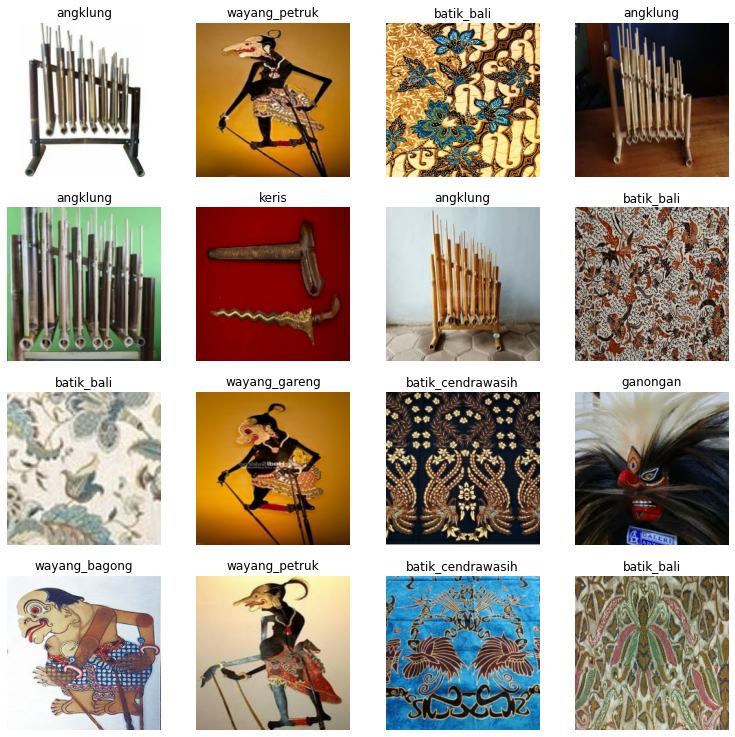

In [19]:
plt.figure(figsize=(13, 13))
for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Model 1
model pertama menggabungkan minimal 2 kmbinassi pretrained architectures yang berbeda sebagai ekstraksi fitur.
Training pembobotan dilakukan pada layer eksperiment dengan menerapkan improvisasi training.

In [20]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=IMG_SIZE + (3,)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Using dropouts
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(12, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [21]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# history = model.fit(train_generator,
#                     epochs=10,
#                     steps_per_epoch=len(train_generator),
#                     validation_data=val_generator,
#                     verbose = 1,
#                     validation_steps=len(val_generator))

In [23]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc)) # Get number of epochs

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.figure()

# plt.plot(epochs, loss, 'r', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

# Train Model with Transfer Learning


In [24]:
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.xception import preprocess_input

In [25]:
pretrained_model = InceptionV3(input_shape = (224, 224, 3),
                                include_top = False,
                                weights = 'imagenet')

87924736/87910968 [==============================] - 0s 0us/step


In [26]:
for layer in pretrained_model.layers:
    layer.trainable = False
    
# Print the model summary
#pretrained_model.summary()

In [27]:
last_layer = pretrained_model.get_layer('mixed5')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 12, 12, 768)


In [28]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(12, activation='softmax')(x)

In [29]:
model2 = Model(pretrained_model.input, x)

In [30]:
model2.compile(optimizer=tf.keras.optimizers.Adam(0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_3[0][0]']               
 alization)                     )                                                             

In [31]:
history = model2.fit(train_generator, 
                     epochs=200, 
                     steps_per_epoch=10, 
                     validation_data=val_generator, 
                     validation_steps=3,
                     verbose=1)

Epoch 1/200
10/10 [==============================] - 19s 577ms/step - loss: 4.3192 - accuracy: 0.2219 - val_loss: 2.5193 - val_accuracy: 0.2917
Epoch 2/200
10/10 [==============================] - 6s 568ms/step - loss: 1.8903 - accuracy: 0.4437 - val_loss: 1.1672 - val_accuracy: 0.6146
Epoch 3/200
10/10 [==============================] - 6s 561ms/step - loss: 1.4544 - accuracy: 0.4812 - val_loss: 0.9753 - val_accuracy: 0.6354
Epoch 4/200
10/10 [==============================] - 5s 529ms/step - loss: 1.0154 - accuracy: 0.6125 - val_loss: 0.6479 - val_accuracy: 0.7812
Epoch 5/200
10/10 [==============================] - 6s 613ms/step - loss: 1.0503 - accuracy: 0.6136 - val_loss: 0.7420 - val_accuracy: 0.6979
Epoch 6/200
10/10 [==============================] - 5s 503ms/step - loss: 0.7537 - accuracy: 0.7403 - val_loss: 0.5119 - val_accuracy: 0.8229
Epoch 7/200
10/10 [==============================] - 5s 550ms/step - loss: 0.7766 - accuracy: 0.7188 - val_loss: 0.5394 - val_accuracy: 0.833

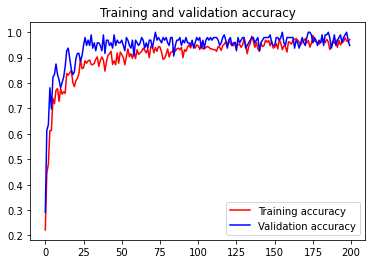

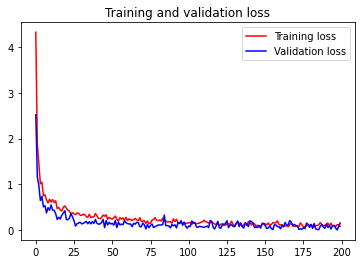

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
loss = model2.evaluate(test_generator, steps=10)

10/10 [==============================] - 1s 80ms/step - loss: 0.1666 - accuracy: 0.9444


In [34]:
# labels = train_generator.class_indices.keys()
# uploaded = files.upload()

# for paths in uploaded.keys():
 
#   # predicting images
#   path = paths
#   img = image.load_img(path, target_size=(224, 224))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)
#   x = preprocess_input(x)

#   images = np.vstack([x])
#   proba = model2.predict(images)[0]
#   plt.imshow(img)
#   plt.show()
#   for (label, p) in zip(labels, proba):
#     print("{}: {:.2f}%".format(label, p * 100))

In [35]:
# labels = train_generator.class_indices.keys()
# uploaded = files.upload()

# for paths in uploaded.keys():
 
#   # predicting images
#   path = paths
#   img = image.load_img(path, target_size=(224, 224))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)
#   x = preprocess_input(x)

#   images = np.vstack([x])
#   proba = model2.predict(images)[0]
#   plt.imshow(img)
#   plt.show()
#   for (label, p) in zip(labels, proba):
#     print("{}: {:.2f}%".format(label, p * 100))

In [36]:
# labels = train_generator.class_indices.keys()
# uploaded = files.upload()

# for paths in uploaded.keys():
 
#   # predicting images
#   path = paths
#   img = image.load_img(path, target_size=(224, 224))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)
#   x = preprocess_input(x)

#   images = np.vstack([x])
#   proba = model2.predict(images)[0]
#   plt.imshow(img)
#   plt.show()
#   for (label, p) in zip(labels, proba):
#     print("{}: {:.2f}%".format(label, p * 100))

# Save the model

In [37]:
saved_model_path = '/content/drive/MyDrive/Bangkit/artnesia/modelling/best_model2.h5'

# Save model h5
model2.save(saved_model_path)

Convert the model to TfLite


In [38]:
ls

 artnesia_compressed.tflite     'Copy of ArtnesiaTfLiteModelling.ipynb'
 artnesia.tflite                 dataset/
 ArtnesiaTfLiteModelling.ipynb   test/
 best_model2.h5                  train/
 best_model.h5                   val/
'Compress the model.ipynb'


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('best_model2.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("artnesia2.tflite", "wb").write(tflite_model)